# Towards a Network-based Approach to Analyze Particle Swarm Optimizers

Here we are going to create most of the plots in:

> Oliveira, Marcos, Carmelo JA Bastos-Filho, and Ronaldo Menezes. "Towards a network-based approach to analyze particle swarm optimizers." Swarm Intelligence (SIS), 2014 IEEE Symposium on. IEEE, 2014. https://doi.org/10.1109/SIS.2014.7011791

```tex
@inproceedings{oliveira2014towards,
  title={Towards a network-based approach to analyze particle swarm optimizers},
  author={Oliveira, Marcos and Bastos-Filho, Carmelo JA and Menezes, Ronaldo},
  booktitle={Swarm Intelligence (SIS), 2014 IEEE Symposium on},
  pages={1--8},
  year={2014},
  organization={IEEE}
}
```

In [1]:
import sys; print(sys.version)

3.9.5 (default, May  4 2021, 03:29:30) 
[Clang 11.0.0 (clang-1100.0.33.17)]


In [2]:
import os; os.chdir("../")

In [6]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from swarm_analyzer import SwarmAnalyzer

For that, we create the influence graph of the swarm at the iteration 1000 using a time window of size 1000:

In [7]:
filename = './data/global_F06_15'
graph = SwarmAnalyzer.create_influence_graph(filename, window_size=1000, calculate_on=1000)

Nice, now we have a graph. Let's check the distribution of edges weight and graph strength.

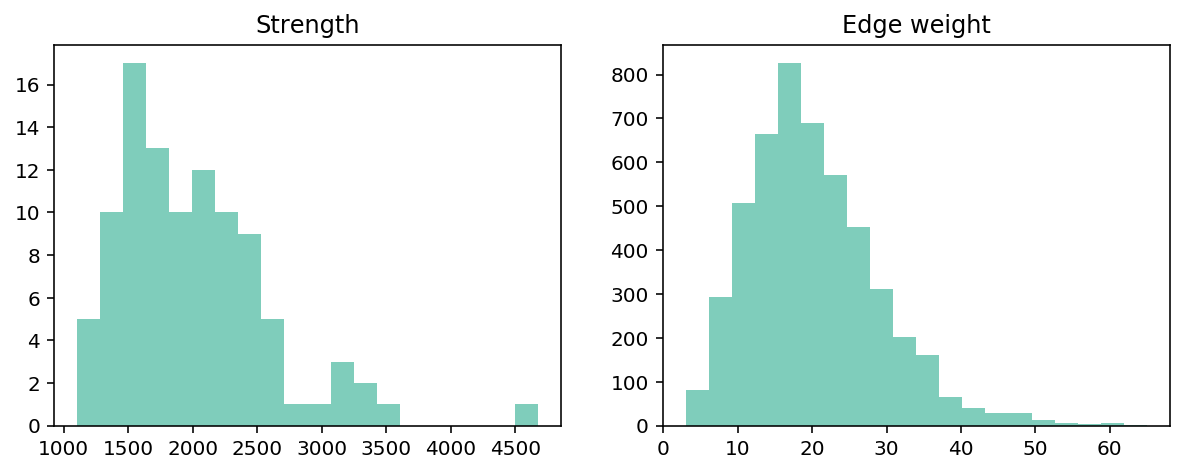

In [8]:
edge_weights = graph.es["weight"]
strength = graph.strength(weights='weight')
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.hist(strength, bins=20, color="#7fcdbb")
plt.title("Strength")
plt.subplot(1, 2, 2)
plt.hist(edge_weights, bins=20, color="#7fcdbb")
plt.title("Edge weight")
plt.show()

This is Fig. 6 in the paper (for global topology).

In [11]:
import powerlaw

In [15]:
import statsmodels.api as sm # recommended import according to the docs


ModuleNotFoundError: No module named 'statsmodels'

In [12]:
strength_fit = powerlaw.Fit(strength)
edge_weights_fit = powerlaw.Fit(edge_weights)

Calculating best minimal value for power law fit
/usr/local/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
Calculating best minimal value for power law fit


In [ ]:
import matplotlib.pyplot as plt

sample = np.random.uniform(0, 1, 50)
ecdf = sm.distributions.ECDF(sample)

x = np.linspace(min(sample), max(sample))
y = ecdf(x)
plt.step(x, y)
plt.show()

In [14]:
strength

[1897.0,
 1604.0,
 2289.0,
 4676.0,
 2402.0,
 1602.0,
 1205.0,
 2006.0,
 2492.0,
 1709.0,
 2201.0,
 2497.0,
 1599.0,
 1212.0,
 3190.0,
 1402.0,
 1996.0,
 2296.0,
 2097.0,
 1508.0,
 1512.0,
 1519.0,
 1895.0,
 2695.0,
 1795.0,
 1104.0,
 1598.0,
 1713.0,
 2993.0,
 2205.0,
 2194.0,
 1309.0,
 2091.0,
 2500.0,
 1405.0,
 1604.0,
 2090.0,
 2595.0,
 2394.0,
 1991.0,
 1305.0,
 1601.0,
 2402.0,
 2495.0,
 1898.0,
 1803.0,
 2099.0,
 3308.0,
 1704.0,
 1502.0,
 2595.0,
 1897.0,
 1301.0,
 3193.0,
 1508.0,
 2202.0,
 2106.0,
 2593.0,
 2494.0,
 1507.0,
 1501.0,
 2494.0,
 1706.0,
 2092.0,
 1701.0,
 1904.0,
 2298.0,
 1699.0,
 1302.0,
 1700.0,
 1318.0,
 1998.0,
 2091.0,
 2211.0,
 1500.0,
 1412.0,
 2204.0,
 1699.0,
 2098.0,
 1409.0,
 2099.0,
 1204.0,
 2602.0,
 1600.0,
 1899.0,
 1704.0,
 1301.0,
 1994.0,
 3290.0,
 1210.0,
 1697.0,
 2093.0,
 1610.0,
 3184.0,
 1901.0,
 3489.0,
 1699.0,
 2791.0,
 1503.0,
 2198.0]

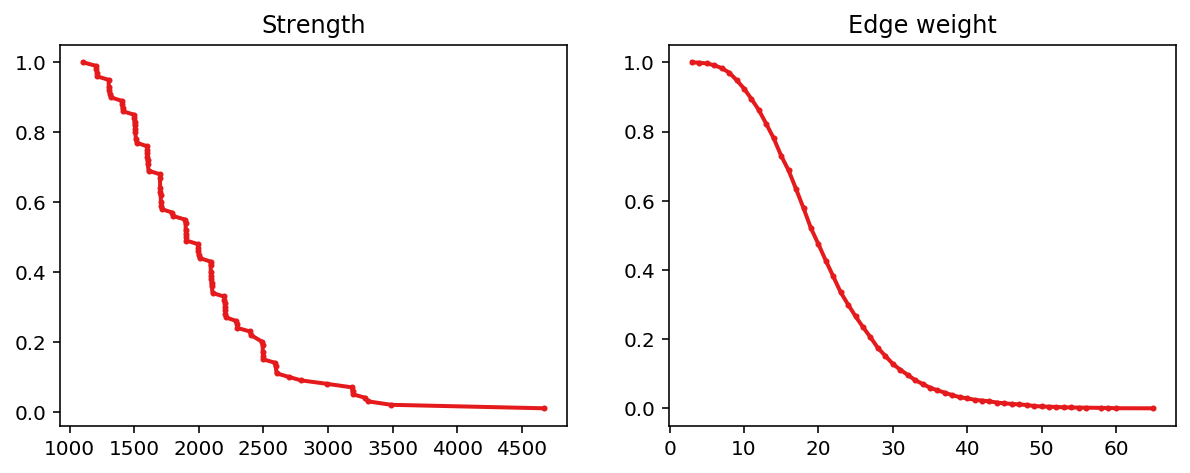

In [13]:
plt.figure(figsize=(10, 3.5))
ax = plt.subplot(1, 2, 1)
strength_fit.plot_ccdf(ax=ax, marker=".", ms=4, original_data=True, lw=2, color="#e41a1c")
plt.xscale("linear")
plt.yscale("linear")
plt.title("Strength")
ax = plt.subplot(1, 2, 2)
edge_weights_fit.plot_ccdf(ax=ax, marker=".", ms=4, original_data=True, lw=2, color="#e41a1c")
plt.xscale("linear")
plt.yscale("linear")
plt.title("Edge weight")
plt.show()

This is Fig. 7 in the paper (for global topology).

# Destroying graphs, constructing plots
Time to analyze how this graph is destroyed as we remove its edges.

In [ ]:
filename = './data/ring_F06_15'
window_size = 1000
calculate_on = 1000
giant_component_destruction_curve_count = SwarmAnalyzer.get_giant_component_destruction_curves(filename, window_size, calculate_on=calculate_on, count='components')
giant_component_destruction_curve_size = SwarmAnalyzer.get_giant_component_destruction_curves(filename, window_size, calculate_on=calculate_on, count='size')

In [ ]:
normalize = 2.*window_size
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.plot(giant_component_destruction_curve_count[0]['x']/normalize, giant_component_destruction_curve_count[0]['y'], lw=2, color="#e41a1c")
plt.title("Number of components")
plt.xlim(0, 1)
ax = plt.subplot(1, 2, 2)
plt.plot(giant_component_destruction_curve_size[0]['x']/normalize, giant_component_destruction_curve_size[0]['y'], lw=2., color="#e41a1c")
plt.title("Giant component size")
plt.xlim(0, 1)
plt.show()

This is Fig. 9 in the paper (for global topology).